In [36]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import pandas as pd
from pandas import read_excel

In [27]:
def En(j, n, m, folder):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/toblerone/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

In [28]:
en0 = En(0, 1, 121, "")
en1 = En(1, 1, 121, "n,1/")

In [29]:
h = []
mu = []
for x in range(1, 119):
    h.append((en1[x - 1] - en0[x]) / -2)
    mu.append((en1[x + 1] - en0[x]) / 2)
    


h2 = np.arange(h[0], 2.7, 0.1)
def mu2(h):
    return - h + en0[0]

h3 = np.arange(h[-1], 11, 0.2)
def mu3(h):
    return (- h - en0[118] + en0[119])


In [30]:
df= pd.read_excel('w3-40-toblerone.xlsx')

mu4, h4 = [], []
for i in list(range(1,120)):
    mu_temp = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h_temp = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu4.append(mu_temp)
    h4.append(h_temp)


In [31]:
e11 = en1[0]

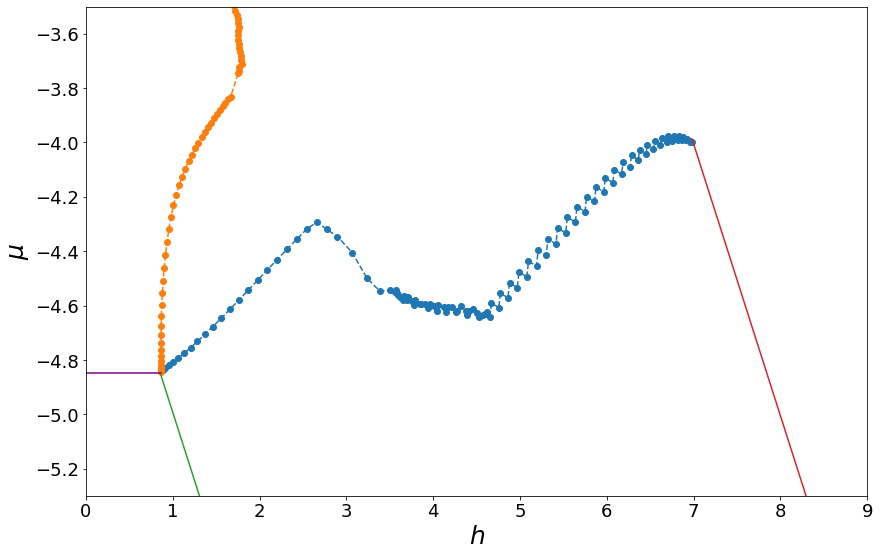

In [34]:
plt.figure(figsize=(14, 9))
xscale = 9

plt.axis([0, xscale, -5.3, -3.5])
plt.plot(h, mu, 'o--', label='$PP-{FP_1}$')
plt.plot(h4, mu4, 'o--')
plt.plot(h2, mu2(h2), '-')
plt.plot(h3, mu3(h3), '-')
plt.axhline(y=(e11/2), color='purple', xmax=(h[0]/xscale))

plt.tick_params(axis='both', which='major', labelsize=18)
#plt.text(0.6, -4.0, '$ED$', fontsize=26, color='darkblue')
#plt.text(0.6, -4.75, '$V$', fontsize=26, color='darkblue')
#plt.text(3.6, -3.9, '$PP$', fontsize=26, color='darkblue')
#plt.text(4.2, -4.75, '$FP_1$', fontsize=26, color='darkblue')
#plt.text(8, -4, '$FP_2$', fontsize=26, color='darkblue')

plt.xlabel('$h$', size=25)
plt.ylabel('$\mu$', size=25)

plt.savefig('toblerone_diagram.png')


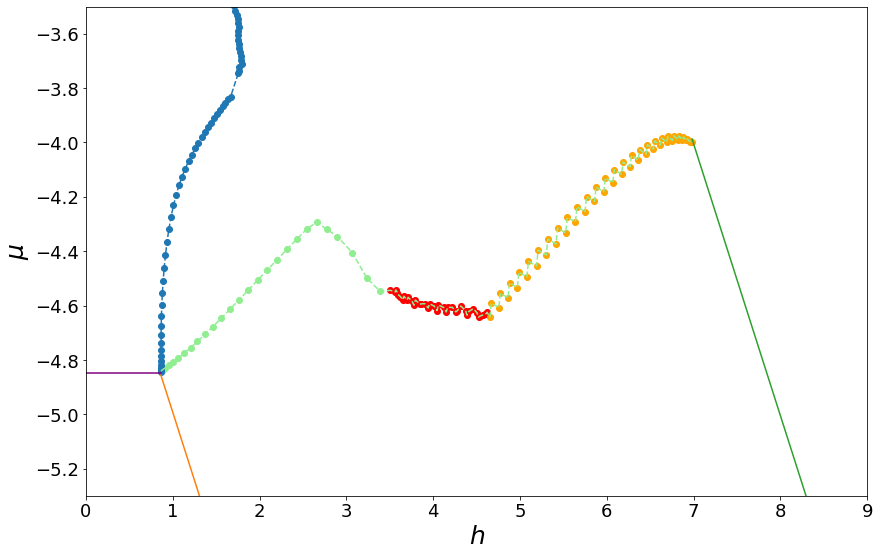

In [35]:
plt.figure(figsize=(14, 9))
xscale = 9
plt.axis([0, xscale, -5.3, -3.5])
plt.plot(h4, mu4, 'o--')
plt.plot(h2, mu2(h2), '-')
plt.plot(h3, mu3(h3), '-')
plt.axhline(y=(e11/2), color='purple', xmax=(h[0]/xscale))
plt.plot(h, mu, '--', color='lightgreen')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('$h$', size=25)
plt.ylabel('$\mu$', size=25)

           
for i in range(0, len(mu)):
    if 27 <= i < 65:
        plt.scatter(h[i], mu[i], marker='o', color='red')
    elif i >= 65:
        plt.scatter(h[i], mu[i], marker='o', color='orange')
    else:
        plt.scatter(h[i], mu[i], marker='o', color='lightgreen')
        
plt.savefig('tob_diag_2.png')